In [9]:
!pip install numpy pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
advertising = pd.read_csv('advertising_data.csv')
advertising.sample(10)
advertising.shape
# advertising.info
# advertising.describe()

(200, 4)

In [27]:
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

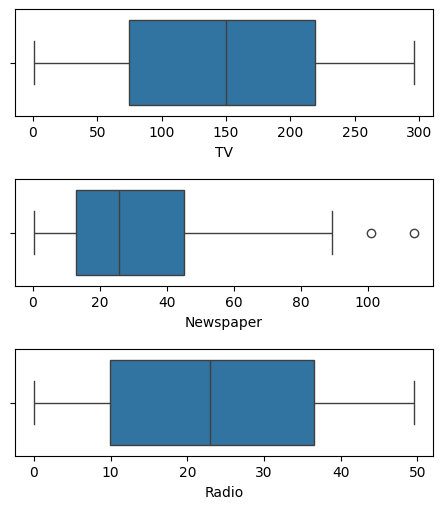

In [30]:
fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(advertising['TV'], ax=axs[0], orient='h')
plt2 = sns.boxplot(advertising['Newspaper'], ax=axs[1], orient='h')
plt.tight_layout()
plt3 = sns.boxplot(advertising['Radio'], ax=axs[2], orient='h')

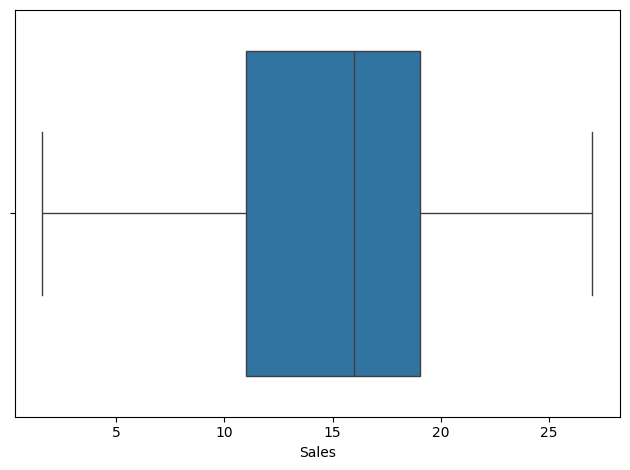

In [37]:
sns.boxplot(advertising['Sales'],orient='h')
plt.tight_layout()

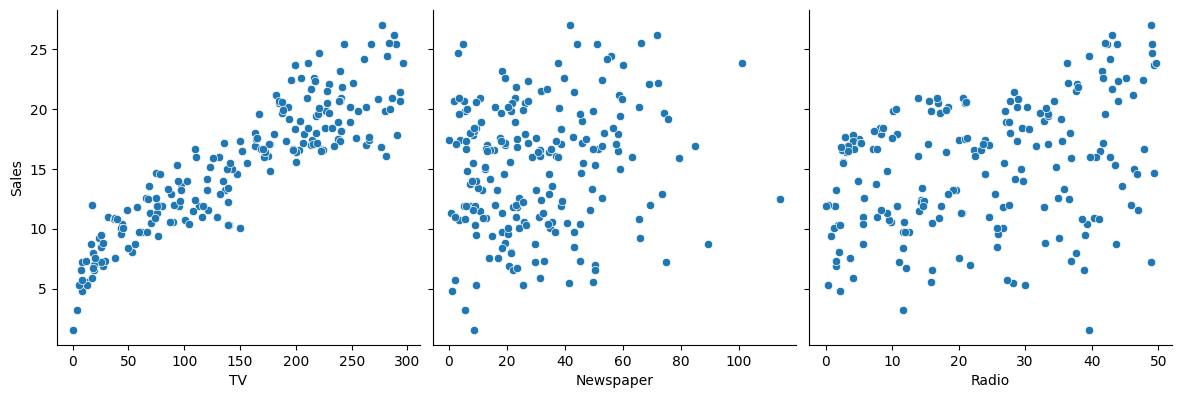

In [38]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

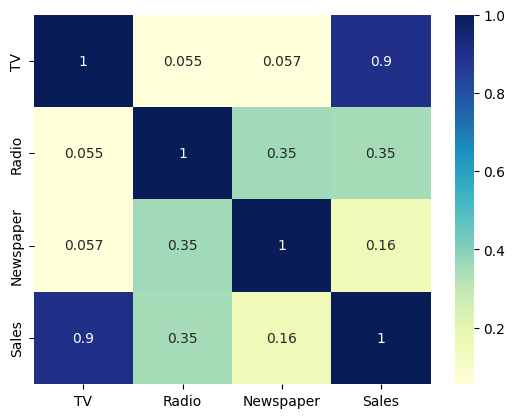

In [41]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [7]:
X = advertising.drop(columns=['Sales'])
y = advertising['Sales']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3,random_state=100)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

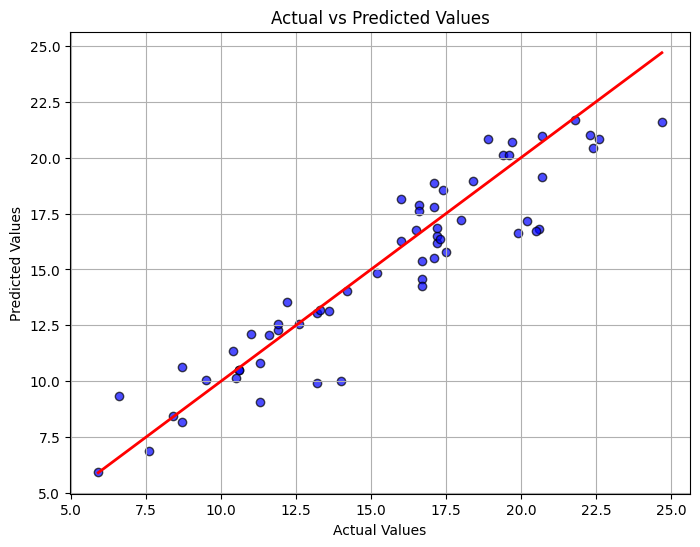

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

In [71]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 2.64
Mean Absolute Error (MAE): 1.23
R-squared (R²): 0.87
